Popularity based recommendation systems

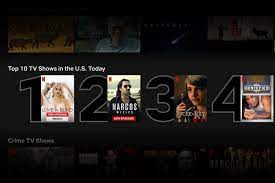

In [2]:
import numpy as np
import pandas as pd

In [3]:
movie_names = pd.read_csv('sample_data/movies.csv')
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_data = pd.read_csv('sample_data/ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
movie_data = pd.merge(movie_names, ratings_data, on='movieId')
movie_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [6]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

In [7]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Survive and Advance (2013)                                                           5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993)                                       5.0
Last Dragon, The (1985)                                                              5.0
Boy Crazy (2009)                                                                     5.0
Brandon Teena Story, The (1998)                                                      5.0
Name: rating, dtype: float64

In [8]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [9]:
movie_data[['title','rating']]

,title,rating
0,Toy Story (1995),3.0
1,Toy Story (1995),4.0
2,Toy Story (1995),5.0
3,Toy Story (1995),2.0
4,Toy Story (1995),3.0
...,...,...
99999,The Last Brickmaker in America (2001),5.0
100000,Stranger Things,4.5
100001,Rustom (2016),5.0
100002,Mohenjo Daro (2016),3.0


In [10]:
##Get the ratings Mean count
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [11]:
ratings_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [12]:
## Get the ratings count for each of the movies
ratings_mean_count['ratings_count'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [13]:
ratings_mean_count

,rating,ratings_count
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


In [14]:
ratings_mean_count['rating'] = round(ratings_mean_count['rating'],1)
ratings_mean_count.head()

,rating,ratings_count
title,,
"""Great Performances"" Cats (1998)",1.8,2
$9.99 (2008),3.8,3
'Hellboy': The Seeds of Creation (2004),2.0,1
'Neath the Arizona Skies (1934),0.5,1
'Round Midnight (1986),2.2,2


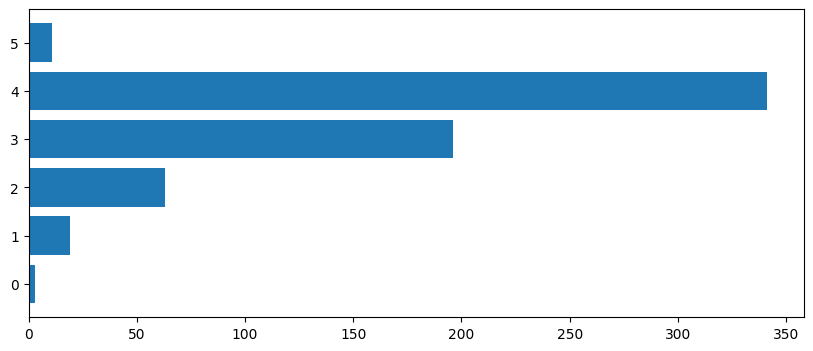

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
ax = plt.barh(ratings_mean_count['rating'].round(), ratings_mean_count['ratings_count'])
plt.show()

In [16]:
##filter the list with >3 rating and ratings count >100
ratings_popular = ratings_mean_count[(ratings_mean_count.rating >3) & (ratings_mean_count.ratings_count >100)]
ratings_popular

,rating,ratings_count
title,,
2001: A Space Odyssey (1968),3.9,123
Airplane! (1980),3.8,106
Aladdin (1992),3.7,215
Alien (1979),4.0,127
Aliens (1986),3.9,125
...,...,...
While You Were Sleeping (1995),3.4,101
Who Framed Roger Rabbit? (1988),3.7,108
Willy Wonka & the Chocolate Factory (1971),3.8,148


In [19]:
#Sort it
ratings_top_10 = ratings_popular.sort_values(by='rating',ascending=False).head(10)
ratings_top_10

,rating,ratings_count
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
Schindler's List (1993),4.3,244
Taxi Driver (1976),4.2,118


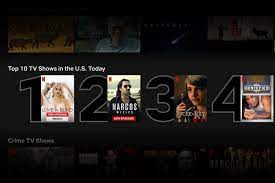